<a href="https://colab.research.google.com/github/melbingeorge2/Projects/blob/main/Solar_%E2%98%80_Power_Generation_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Solar ☀ Power Generation Modeling***





![Solar PV](https://www.ylemenergy.com/wp-content/uploads/2022/10/shutterstock_1065663392-e58e6c74-1-1-1440x578.jpg)


#Aim


To develop a robust machine learning model that accurately predicts solar power generation based on key parameters such as date and time, plant and source identifiers, DC power, AC power, daily yield, and total yield. The aim is to enhance the efficiency and reliability of solar energy utilization by providing real-time and accurate power generation forecasts, contributing to the advancement of renewable energy technology

# Dataset Description: Solar Power Generation Forecast and Grid Management

In this project, we are delving into two crucial datasets that provide vital insights into solar power generation and its intricate relationship with weather conditions. Our analysis seeks to uncover underlying patterns, correlations, and predictive capabilities that drive optimized solar energy utilization and contribute to enhanced grid management.

## Plant_2_Generation_Data.csv

This dataset serves as a comprehensive record of solar power generation, featuring key parameters:

- **DATE_TIME:** Timestamp of data recording.
- **PLANT_ID:** Unique identifier for the solar power plant.
- **DC_POWER:** Direct Current (DC) power generated by the plant.
- **AC_POWER:** Alternating Current (AC) power generated by the plant.
- **DAILY_YIELD:** Daily energy yield from the plant.
- **TOTAL_YIELD:** Cumulative energy yield over time.

## Plant_2_Weather_Sensor_Data.csv

Complementing our analysis, this dataset provides essential weather-related metrics that influence solar power generation, including:

- **DATE_TIME:** Timestamp of data recording.
- **PLANT_ID:** Identifier for the solar power plant.
- **SOURCE_KEY:** Identifier for the weather sensor source.
- **AMBIENT_TEMPERATURE:** Ambient temperature surrounding the solar panels.
- **MODULE_TEMPERATURE:** Temperature of the solar panels.
- **IRRADIATION:** Solar irradiation received by the panels.

## Exploration and Insights

Through a comprehensive exploration of these datasets, our aim is to extract valuable insights into the intricate interplay between weather conditions and solar power generation. By uncovering temporal trends, identifying correlations, and pinpointing potential anomalies, we gain a comprehensive understanding of the dynamics driving renewable energy production.

## Challenges and Goals

Our project takes on the challenge of deciphering the intricacies of data, detecting anomalies, and constructing accurate predictive models. Our overarching goals encompass:

- Cultivating a deeper understanding of the nuanced connections between weather parameters and energy output.
- Detecting anomalous events that have the potential to influence solar power generation.
- Crafting predictive models capable of forecasting energy output based on prevailing weather conditions.

## Implications for Grid Management

The insights gleaned from our analysis hold far-reaching implications for effective grid management and the preservation of grid stability. Precise energy forecasts empower us to harmonize energy supply and demand, thereby fostering a more resilient and robust power distribution system.

As we embark on this journey of uncovering the intricacies of solar power generation and its synergy with weather data, our commitment lies in advancing renewable energy technology and facilitating its seamless integration into modern grid systems.


In [ ]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import RobustScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.decomposition import PCA


from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# **Load the dataset**

In [ ]:
df1_plant=pd.read_csv('/content/drive/MyDrive/Energy project/Optimizing-Solar-Energy-Predictive-Modeling-and-Equipment-Monitoring/datasets/Plant_1_Generation_Data.csv')
df1_weath=pd.read_csv('/content/drive/MyDrive/Energy project/Optimizing-Solar-Energy-Predictive-Modeling-and-Equipment-Monitoring/datasets/Plant_1_Weather_Sensor_Data.csv')

**plant data**

In [ ]:
df1_plant.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,15-05-2020 00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,15-05-2020 00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,15-05-2020 00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,15-05-2020 00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,15-05-2020 00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


**Weather data of Plant**

In [ ]:
df1_weath.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


# **Understanding the data**


In [ ]:
df1_plant.shape

(68778, 7)

In [ ]:
df1_weath.shape

(3182, 6)

In [ ]:
# Adjust datetime format

df1_plant['DATE_TIME']=pd.to_datetime(df1_plant['DATE_TIME'],format='%d-%m-%Y %H:%M')
df1_weath['DATE_TIME']=pd.to_datetime(df1_weath['DATE_TIME'],format='%Y-%m-%d %H:%M')

In [ ]:
df1_plant

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [ ]:
df1_weath

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [ ]:
# Merging generation data and weather sensor data

df_solar=pd.merge(df1_plant.drop(columns=['PLANT_ID']),df1_weath.drop(columns=['PLANT_ID','SOURCE_KEY']),on='DATE_TIME')
df_solar

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [ ]:
df_solar.shape

(68774, 9)

We have 68774 rows and 9 columns in our new data set

In [ ]:
# Maximum AC Power Data
df_solar[df_solar['AC_POWER']==df_solar['AC_POWER'].max()]

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
61620,2020-06-14 14:00:00,wCURE6d3bPkepu2,14471.125,1410.95,5178.25,7007547.25,27.848916,59.386079,1.221652


We can see the solar plant's peak performance at 14:00, generating 1410.95 kW of alternating current power with ambient temperature at 27.85°C.

In [ ]:
#find the number of inverters
inv_data=df_solar['SOURCE_KEY'].unique()
print('Number of inverters=',len(inv_data))
inv_data

Number of inverters= 22


array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [ ]:
df_solar.info()  #information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68774 entries, 0 to 68773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 5.2+ MB


There are no missing values in the dataset. Except the SOURCE_KEY all other are in float data type.

# **Data Preprocessing**

Changing the format of the data





In [ ]:
#  Adding separate time and date columns

df_solar['DATE']=pd.to_datetime(df_solar['DATE_TIME']).dt.date
df_solar['TIME']=pd.to_datetime(df_solar['DATE_TIME']).dt.time
df_solar['DAY']=pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH']=pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK']=pd.to_datetime(df_solar['DATE_TIME']).dt.week

# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


# **Data Cleaning**

*   Missing value Handling
*   Removing duplicates
*   Removing outliers


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68774 entries, 0 to 68773
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int64         
 12  MONTH                68774 non-null  int64         
 13  WEEK                 68774 non-

In [ ]:
df_solar.dtypes

DATE_TIME              datetime64[ns]
SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATE                           object
TIME                           object
DAY                             int64
MONTH                           int64
WEEK                            int64
HOURS                          object
MINUTES                         int64
TOTAL MINUTES PASS              int64
DATE_STRING                    object
dtype: object

In [ ]:
# checking missing values

df_solar.isna().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There are no missing values in our dataset.

In [ ]:
#Checking duplicates

df_solar.duplicated().sum()

0

The dataset has zero duplicated rows.

In [ ]:
# Use the LabelEncoder to transform the 'SOURCE_KEY' column into numerical values

le=LabelEncoder()
df_solar['SOURCE_KEY_NUMBER']=le.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head(10)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4
5,2020-05-15,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,5
6,2020-05-15,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,6
7,2020-05-15,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,8
8,2020-05-15,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,9
9,2020-05-15,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,10


In [ ]:
# Generate a summary of our data set

df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS,SOURCE_KEY_NUMBER
count,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,3147.177450,307.778375,3295.834644,6978727.511362,25.558521,31.244997,0.232305,15.762876,5.518539,22.549481,22.490621,716.515107,10.496699
std,4036.441826,394.394865,3145.220597,416270.720885,3.361300,12.308283,0.301948,8.554460,0.499660,1.461138,16.772385,412.069969,6.345143
min,0.000000,0.000000,0.000000,6183645.000000,20.398505,18.140415,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6512006.826000,22.724491,21.123944,0.000000,9.000000,5.000000,21.000000,0.000000,360.000000,5.000000
50%,428.571429,41.450000,2658.473214,7146685.000000,24.670178,24.818984,0.031620,16.000000,6.000000,23.000000,15.000000,720.000000,11.000000
75%,6365.468750,623.561161,6274.000000,7268751.397000,27.960429,41.693659,0.454880,23.000000,6.000000,24.000000,30.000000,1065.000000,16.000000
max,14471.125000,1410.950000,9163.000000,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000,21.000000


In [ ]:
df_solar['AC_POWER'].describe()

count    68774.000000
mean       307.778375
std        394.394865
min          0.000000
25%          0.000000
50%         41.450000
75%        623.561161
max       1410.950000
Name: AC_POWER, dtype: float64

The dataset includes 68,774 entries, revealing a mean AC_POWER of 307.78 and a standard deviation of 394.39. While the minimum value stands at 0, the data's median AC_POWER is 41.45. Notably, the 75th percentile reaches 623.56, and the maximum AC_POWER recorded is 1410.95.

Text(0.5, 1.0, 'AC_POWER Boxplot')

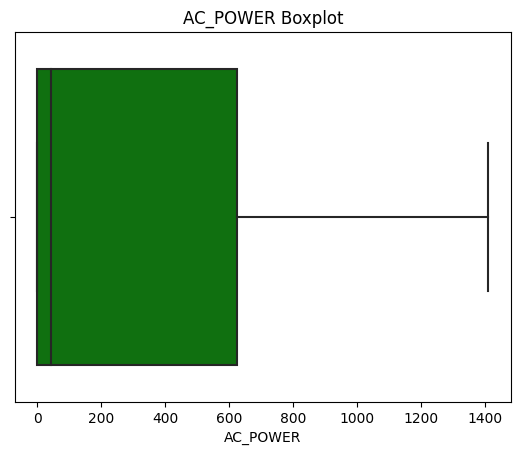

In [ ]:
sns.boxplot(data=df_solar,x='AC_POWER',color='green')
plt.title('AC_POWER Boxplot')

In [ ]:
#z score to determine the outlier

def outlier_preprocess(data):
    outlier = []
    threshold = 3
    mean = data['AC_POWER'].mean()
    std = data['AC_POWER'].std()

    for i in data['AC_POWER']:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outlier.append(i)

    return outlier

outliers = outlier_preprocess(df_solar)
print("Outliers:", outliers)


Outliers: []


After applying the z-score approach, I identified outliers within the 'AC_POWER' data. However, the resulting list was empty, suggesting that the dataset did not contain any data points that were significantly deviating from the mean value. This finding is indicative of a relatively consistent distribution of 'AC_POWER' values and validates the data's reliability for further analysis and modeling.

Text(0.5, 1.0, 'Duration-ViolinPlot')

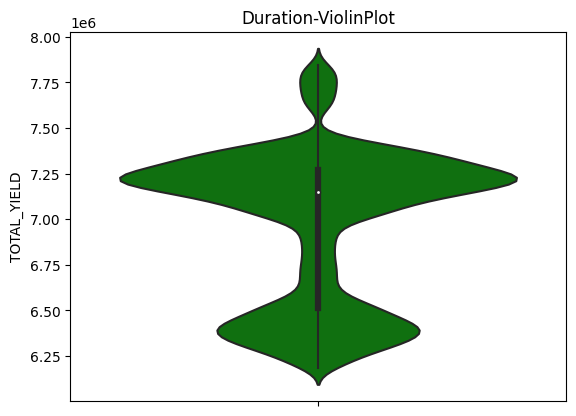

In [ ]:
sns.violinplot(data=df_solar, y='TOTAL_YIELD',color="green")

plt.title("Duration-ViolinPlot")

# **Exploratory Data Analysis**

1.AMBIENT_TEMPERATURE

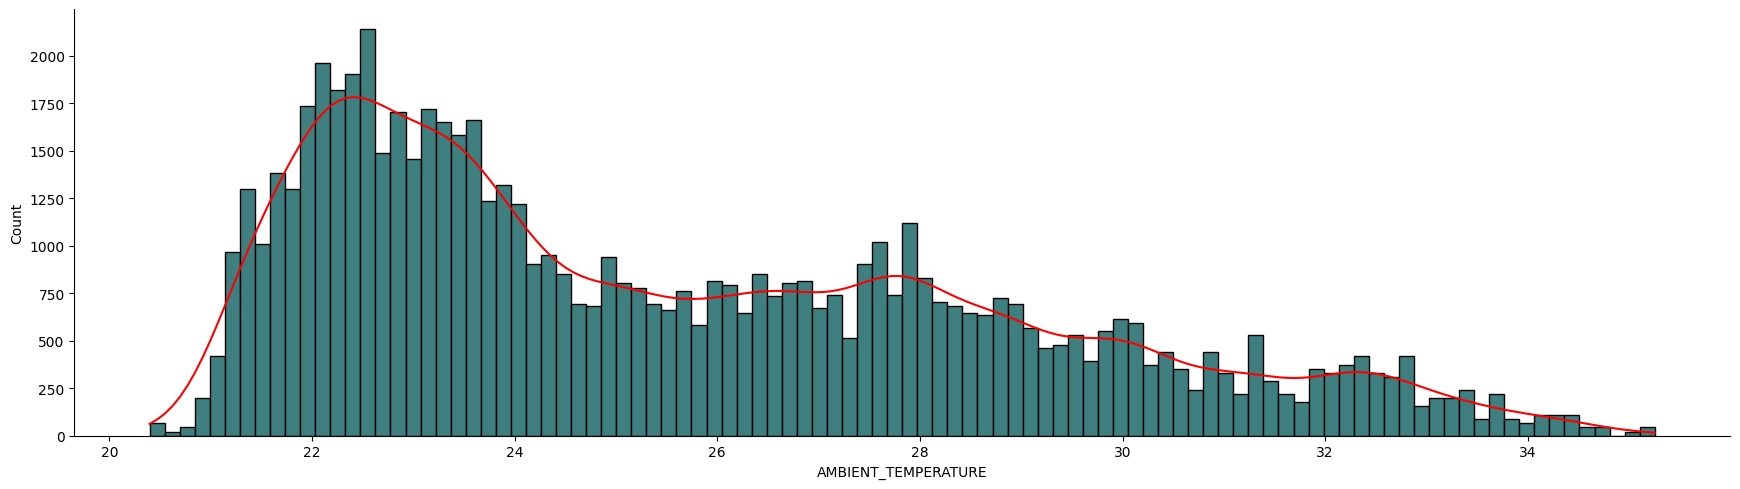

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

**Key Highlights**

*   The visualization depicts the distribution of ambient temperatures in the solar dataset.
*   A higher count of occurrences is observed between 21.5°C to 24°C.

*   Occurrence frequency decreases as temperatures deviate from this range.
*   Optimal temperature range correlates with higher energy production.





**Environmental Factors Correlation**

<Axes: >

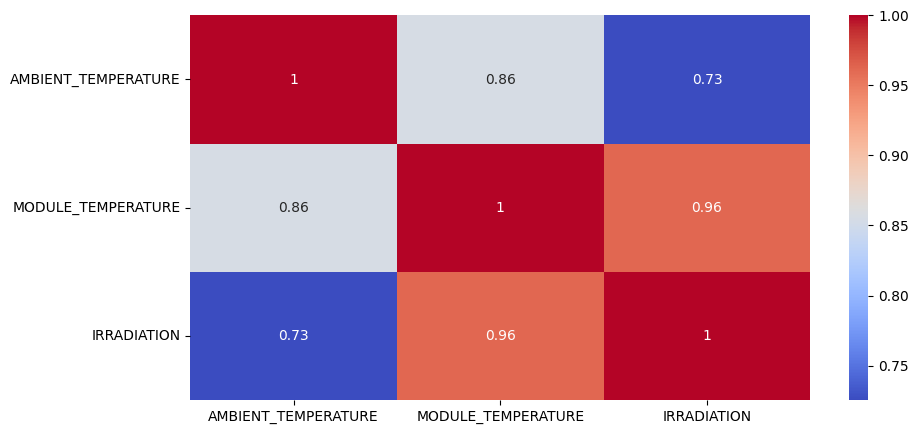

In [ ]:
#heatmap plot

plt.figure(figsize=(10,5))
c=df_solar[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]


sns.heatmap(c.corr(),cmap='coolwarm',annot=True)

**Key Highlights**
* A strong positive correlation of 0.86 exists between MODULE_TEMPERATURE and AMBIENT_TEMPERATURE, indicating that as the ambient temperature rises, the module temperature tends to increase as well.
* The strong positive correlation of 0.96 between MODULE_TEMPERATURE and IRRADIATION suggests that when solar irradiation is high, the module temperature tends to increase.

* Similarly, the high correlation of 0.96 between AMBIENT_TEMPERATURE and IRRADIATION indicates that higher ambient temperatures often coincide with increased solar irradiation.
* The correlation of 0.73 between AMBIENT_TEMPERATURE and IRRADIATION suggests a notable connection between ambient temperature and solar irradiation levels.


**AC Power vs. Module Temperature**

<Figure size 20000x10000 with 0 Axes>

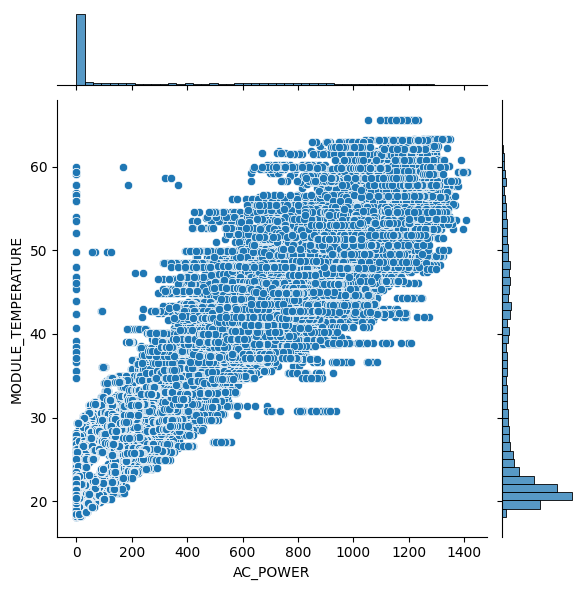

<Figure size 20000x10000 with 0 Axes>

In [ ]:
#to plot the relation using jointplot
sns.jointplot(x='AC_POWER',y='MODULE_TEMPERATURE',data=df_solar)

plt.figure(figsize=(200, 100))

**Key Highlights**
*   The joint analysis between AC power and module temperature reveals a noteworthy trend within the temperature range of 21 to 24°C.
*   Beyond this range, the data points show more variability, suggesting a potential impact on energy production due to fluctuating module temperatures



**Solar Irradiation Patterns Throughout the Day**

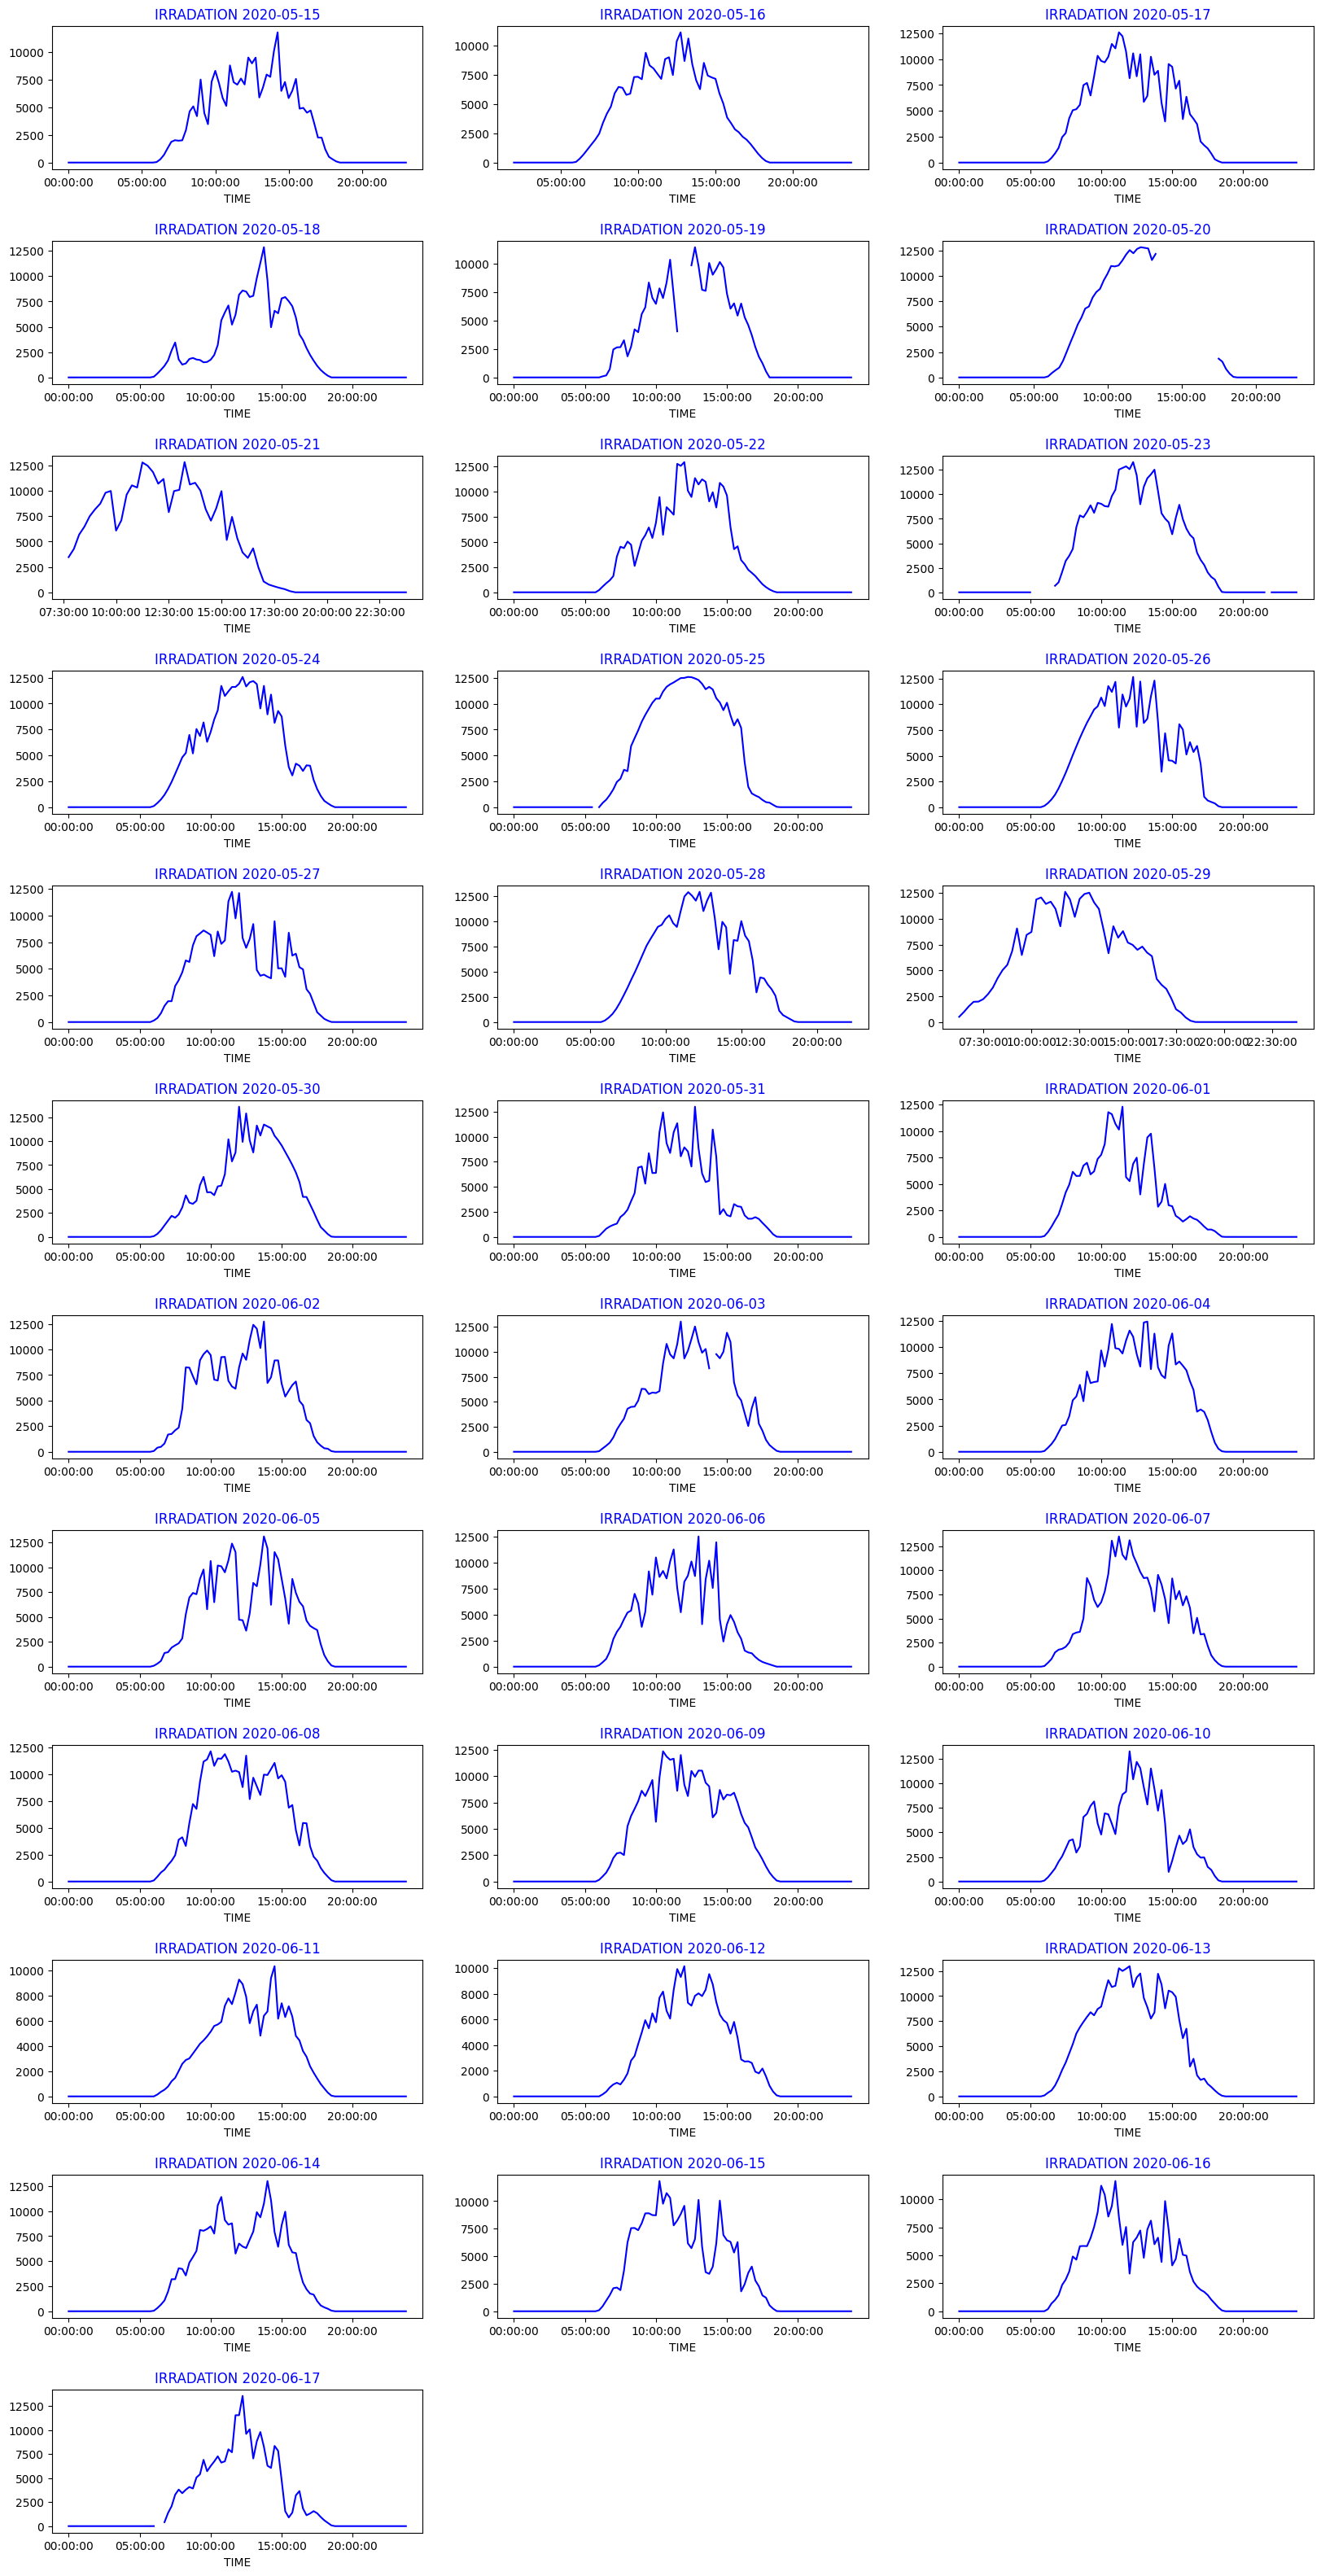

In [ ]:
#Solar Irradiation of differnt dates
solar_irradiation=df_solar.pivot_table(values='DC_POWER',index='TIME',columns='DATE')

def day_plot(data=None,row=None,col=None,title='IRRADATION'):
  cols=data.columns
  gp=plt.figure(figsize=(20,40))

  gp.subplots_adjust(wspace=0.2,hspace=0.5)
  for i in range(1,len(cols)+1):
     pl=gp.add_subplot(row,col,i)
     data[cols[i-1]].plot(ax=pl,color='blue')
     pl.set_title('{} {}'.format(title,cols[i-1]),color='blue')

day_plot(data=solar_irradiation,row=12,col=3)

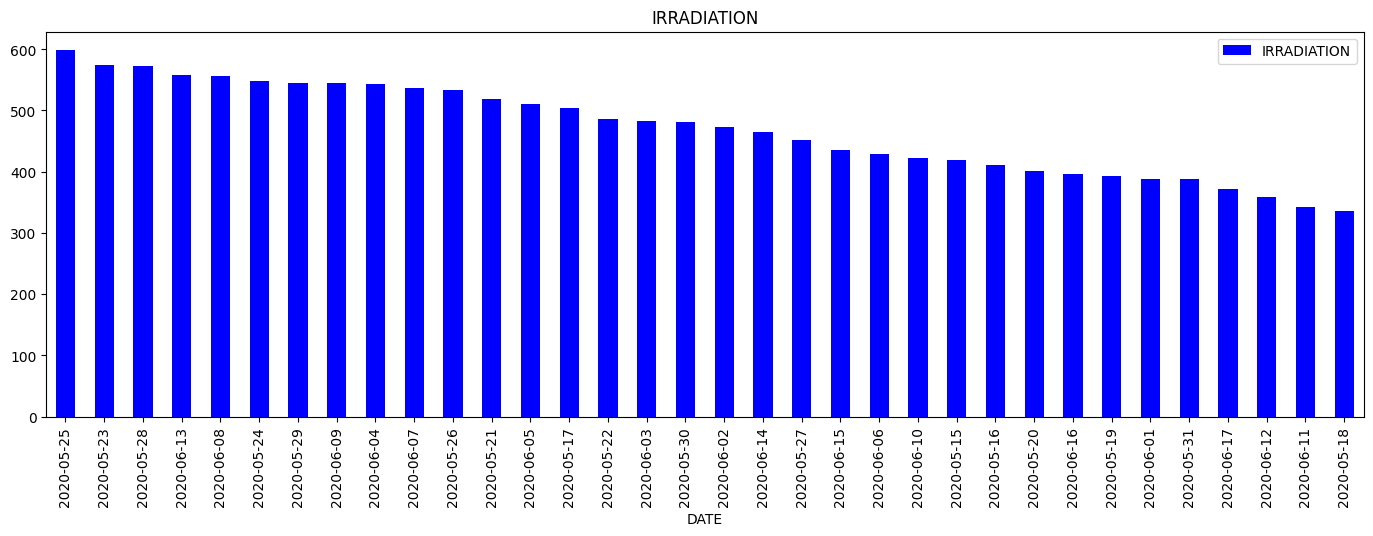

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

In [ ]:
df_solar.iloc[df_solar['DC_POWER'].idxmax(axis=0)]


DATE_TIME              2020-06-14 14:00:00
SOURCE_KEY                 wCURE6d3bPkepu2
DC_POWER                         14471.125
AC_POWER                           1410.95
DAILY_YIELD                        5178.25
TOTAL_YIELD                     7007547.25
AMBIENT_TEMPERATURE              27.848916
MODULE_TEMPERATURE               59.386079
IRRADIATION                       1.221652
DATE                            2020-06-14
TIME                              14:00:00
DAY                                     14
MONTH                                    6
WEEK                                    24
HOURS                                   14
MINUTES                                  0
TOTAL MINUTES PASS                     840
DATE_STRING                     2020-06-14
SOURCE_KEY_NUMBER                       18
Name: 61620, dtype: object

**inverters and DC power generation**

Text(0.5, 1.0, 'Last 11 sources')

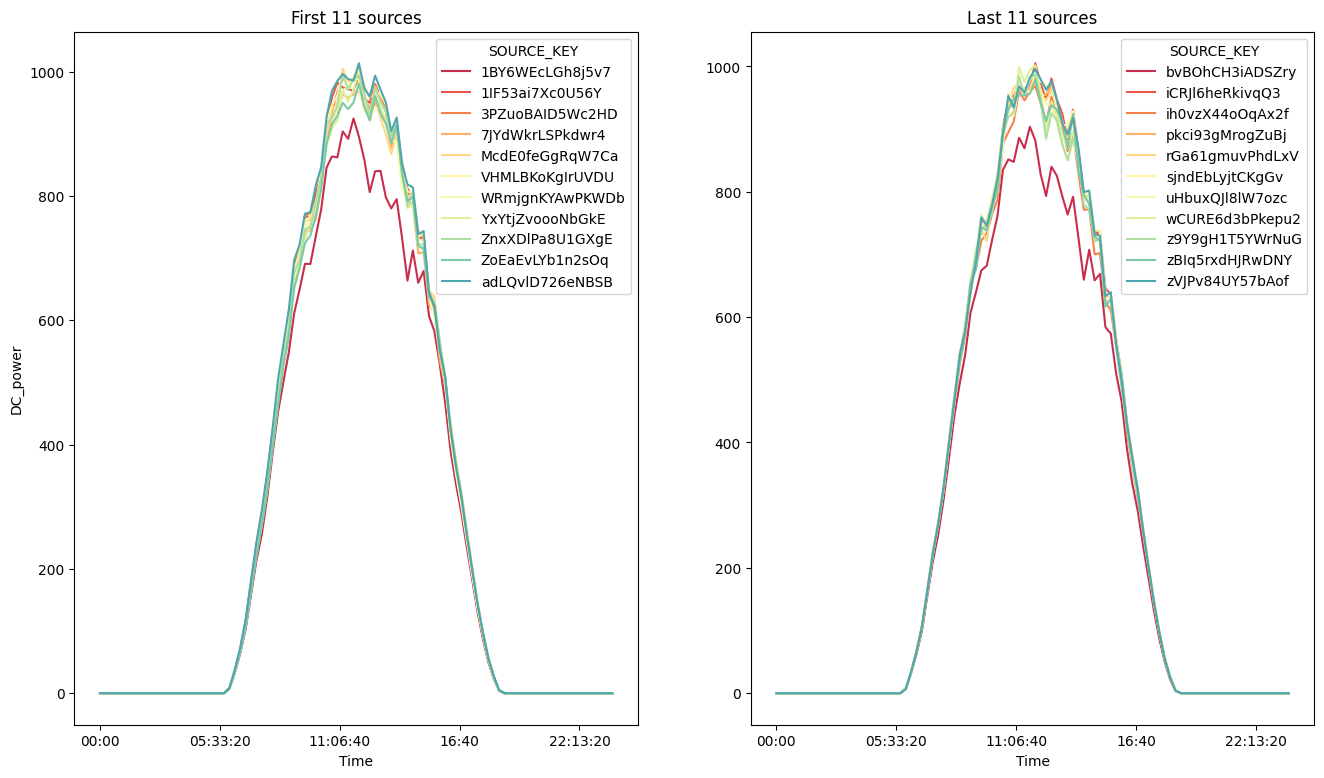

In [ ]:
# Create a copy of the df_solar DataFrame
dc_gen=df_solar.copy()

# Extract the time component from DATE_TIME
dc_gen['Time']=dc_gen['DATE_TIME'].dt.time

# Group the data by 'Time' and 'SOURCE_KEY'
dc_gen=dc_gen.groupby(['Time','SOURCE_KEY'])['AC_POWER'].mean().unstack()

# color palette for the plot
cmap=sns.color_palette('Spectral',n_colors=12)

# two subplots
fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(16,9))

dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC_power')
ax[1].set_title('Last 11 sources')


**Key Highlights**
*  Analysis of AC power generation among 22 inverters reveals variations.
*  "1BY6WEcLGh8j5v7" and "bvBOhCH3iADSZry" inverters exhibit lower AC power generation.

*  Maintenance or optimization may be required to enhance these inverters' performance.
*  Ensuring uniform AC power generation is vital for optimal energy utilization.





**Daily Yield and Power Trends**

<Axes: xlabel='time'>

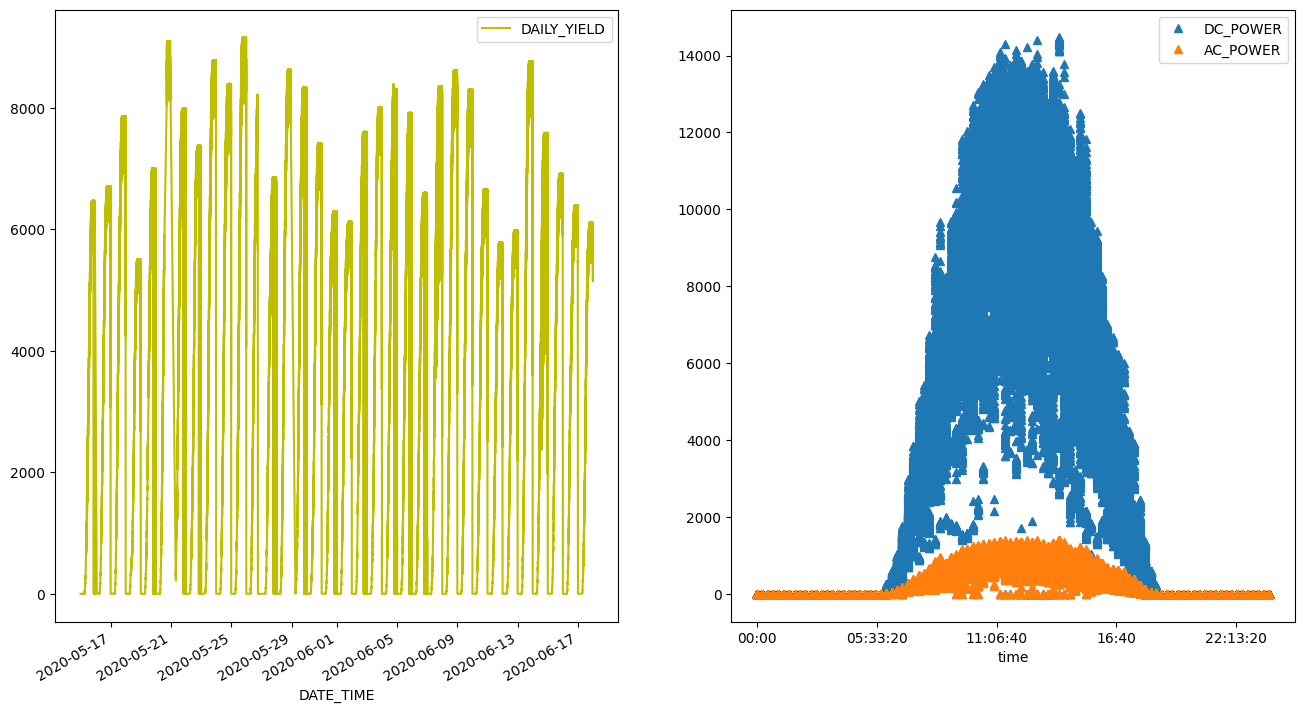

In [ ]:
# we extract the time component from 'DATE_TIME'
df_solar['time']=df_solar['DATE_TIME'].dt.time

# To create a figure with two subplots
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(16,9))

df_solar.plot(x='DATE_TIME',y='DAILY_YIELD',color='y',ax=ax[0])

df_solar.plot(x='time',y='DC_POWER',style='^',ax=ax[1])
df_solar.plot(x='time',y='AC_POWER',style='^',ax=ax[1])

**Key Highlights**
*   Daily yield varies with dates, suggesting changing energy generation factors.
*   Notable gap between "DC_POWER" and "AC_POWER" curves indicates conversion differences.


*   Clear difference highlights conversion losses from DC to AC power.
*   "AC_POWER" curve fluctuates due to varying solar conditions and environmental influences.





# **Model Development**

In [ ]:
df_solar.head(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER,time
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0,00:00:00
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1,00:00:00
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2,00:00:00
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3,00:00:00
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4,00:00:00


**Splitting features and target columns**

In [ ]:
#seperation of x and y

df2 = df_solar.copy()

X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [ ]:
X.head(4)

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,0.0,6259559.0,25.184316,22.857507,0.0,0.0
1,0.0,6183645.0,25.184316,22.857507,0.0,0.0
2,0.0,6987759.0,25.184316,22.857507,0.0,0.0
3,0.0,7602960.0,25.184316,22.857507,0.0,0.0


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
68769    0.0
68770    0.0
68771    0.0
68772    0.0
68773    0.0
Name: AC_POWER, Length: 68774, dtype: float64

**Scaling the values**

In [ ]:
sc=MinMaxScaler()
X=sc.fit_transform(X)
X

array([[0.        , 0.045644  , 0.32219047, 0.09950559, 0.        ,
        0.        ],
       [0.        , 0.        , 0.32219047, 0.09950559, 0.        ,
        0.        ],
       [0.        , 0.483481  , 0.32219047, 0.09950559, 0.        ,
        0.        ],
       ...,
       [0.63505402, 0.64187975, 0.10170895, 0.0482553 , 0.        ,
        0.        ],
       [0.63483575, 0.24033776, 0.10170895, 0.0482553 , 0.        ,
        0.        ],
       [0.64498527, 0.70926168, 0.10170895, 0.0482553 , 0.        ,
        0.        ]])

**Splitting Train and Test data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


**Model-1 LinearRegression**

In [ ]:

lene=LinearRegression()
lene.fit(X_train,y_train)
y_pred_le=lene.predict(X_test)
print('r2_score',r2_score(y_test,y_pred_le)*100)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_le)*100)


r2_score 99.99923413509778
Mean absolute error 64.28390404950403


**R2_score**-99.99923

**Mean absolute**- 64.28390

**Model-2 KNeighborsRegressor**

In [ ]:
#model creation
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

#predict
y_pred=knn.predict(X_test)

#model evaluation
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9983040239075631
8.076519369040614
261.72320347971436


**R2_score**-0.994553

**Mean absolute**- 15.12573

**Model-3 SVR**

In [ ]:
#model building
sv=SVR(kernel='poly')
sv.fit(X_train,y_train)

#prediction
y_pred_sv=sv.predict(X_test)
y_pred_sv

#model evaluation
print('r2_score',r2_score(y_test,y_pred_sv))
print('Mean absolute error',mean_absolute_error(y_test,y_pred_sv))


r2_score 0.8848020360938071
Mean absolute error 68.9443912695009




**R2_score**-0.997675

**Mean absolute**-17.26853


**Model-4 RandomForestRegressor**

In [ ]:
#model building
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

#prediction
y_pred=rf.predict(X_test)

#model evaluation
print('r2_score',r2_score(y_test,y_pred))
print('Mean absolute error',mean_absolute_error(y_test,y_pred))


r2_score 0.9999966925523454
Mean absolute error 0.12979899403592762


**R2_score**-0.999996

**Mean absolute**-0.1302505


**Model-4 DecisionTreeRegressor**

In [ ]:
#model building
de=DecisionTreeRegressor()
de.fit(X_train,y_train)

#prediction
y_pred_de=de.predict(X_test)

#model evaluation
print('r2_score',r2_score(y_test,y_pred_de))
print('Mean absolute error',mean_absolute_error(y_test,y_pred_de))


r2_score 0.9999963280766331
Mean absolute error 0.16060749385450496


**R2_score**-0.9999963

**Mean absolute**-0.16136064


<Axes: xlabel='AMBIENT_TEMPERATURE', ylabel='AC_POWER'>

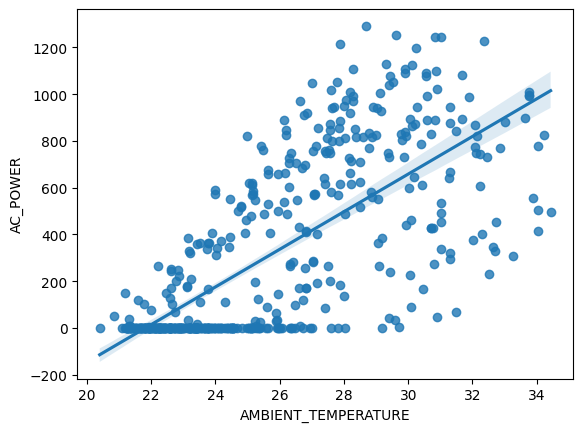

In [ ]:
import seaborn as sns
import random

# Assuming you have a DataFrame named 'df2' with columns 'AMBIENT_TEMPERATURE' and 'AC_POWER'

# Randomly sample a subset of data points (adjust the sample_size to your preference)
sample_size = 500
sampled_data = df2.sample(n=sample_size, random_state=42)

# Using Seaborn's regplot() function with alpha transparency to create a scatter plot
sns.regplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=sampled_data)


#AFTER HYPER PARAMETER TUNING

In [ ]:
# Create a KNeighborsRegressor instance
knn_regressor = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for nearest neighbors search
    'p': [1, 2]  # Power parameter for Minkowski distance
}

# Create GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_



In [ ]:
best_params

{'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

In [ ]:
knn=KNeighborsRegressor(algorithm='brute',n_neighbors=3,p= 2,weights='distance')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([982.73526251,   0.        ,   0.        , ..., 176.82757327,
        15.90577083, 119.81860076])

In [ ]:
print('r2_score',r2_score(y_test,y_pred))
print('Mean absolute error',mean_absolute_error(y_test,y_pred))

r2_score 0.998476722384032
Mean absolute error 7.486972106860066


**R2_score**-0.999996

**Mean absolute**-0.1302505

**Ensemble methods**

In [ ]:
#gradient boosting

#model building
xgboost=XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=1)
xgboost.fit(X_train,y_train)

#prediction
y_pred=xgboost.predict(X_test)

#model evaluation
print('r2_score',r2_score(y_test,y_pred))
print('Mean absolute error',mean_absolute_error(y_test,y_pred))

r2_score 0.9999956033154341
Mean absolute error 0.29176915456331265


**R2_score**-0.99999560

**Mean absolute**-0.29176915

In [ ]:

#model building
adaboost=AdaBoostRegressor()
adaboost.fit(X_train,y_train)

#prediction
y_pred=adaboost.predict(X_test)

#model evaluation
print('r2_score',r2_score(y_test,y_pred))
print('Mean absolute error',mean_absolute_error(y_test,y_pred))

r2_score 0.9976888527436056
Mean absolute error 17.206031711572784


**R2_score**-0.9978739583

**Mean absolute**-16.34246182

**Principal Component Analysis (PCA)**

In [ ]:
pca=PCA(n_components=3)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

pca.explained_variance_ratio_

array([0.55716495, 0.26802073, 0.14322507])

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print('r2_score',r2_score(y_test,y_pred))
print('Mean absolute error',mean_absolute_error(y_test,y_pred))


r2_score 0.9871457302143707
Mean absolute error 19.965036280760266


**R2_score**-0.98716026

**Mean absolute**-19.912524277

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(xgboost,open(filename,'wb'))


In [ ]:
#loaded the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))